In [19]:
# Some sklearn or SMOTE functions show harmless warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Step:- 1 Install Packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Step:- 2 Create Sample Credit Risk Dataset

In [29]:
# To mimic a real-world dataset used for credit risk modeling (probability of default)
np.random.seed(49)
n_samples = 2500

# Feature Data
age = np.random.randint(18,70, size = n_samples)
income = np.random.normal(35000,8000, size = n_samples)
loan_amount = np.random.normal(20000,4000, size=n_samples)

# Default target = 90% non-default (0), 10% default (1)
default = np.random.choice([0,1], size=n_samples, p=[0.9,0.1])

# Create the dataset
df = pd.DataFrame({
    'age': age,
    'income': income,
    'loan_amount': loan_amount,
    'default': default
})

# Step 3:- Define feature (X) and target (y)

In [33]:
x = df[['age', 'income', 'loan_amount']]
y = df['default']

# Step 4:- Split dataset into training and test sets

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=49)

# Step 5:- Fix Class Imbalance using SMOTE (oversampling)

In [39]:
smote = SMOTE(random_state = 49)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Step 6:- Train the logistic regression model

In [43]:
model = LogisticRegression(class_weight='balanced', random_state=49)
model.fit(x_train_resampled,y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=49)

# Step 7:- Make prediction on test data

In [46]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

# Step 8:- Evaluate the model

In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[220 231]
 [ 29  20]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.49      0.63       451
           1       0.08      0.41      0.13        49

    accuracy                           0.48       500
   macro avg       0.48      0.45      0.38       500
weighted avg       0.80      0.48      0.58       500

Accuracy Score: 0.48


# Step 9:- Prepare a results Dataframe with predictions

In [60]:
result_df = x_test.copy()
result_df['Actual_Default'] = y_test.values
result_df['Predicted_Default'] = y_pred
result_df['PD_Probability'] = y_prob
result_df['Status'] = result_df['Predicted_Default'].apply(lambda x: 'Default' if x == 1 else 'Not Default')

print("\n Sample Predictions:")
print(result_df.head(10))


 Sample Predictions:
      age        income   loan_amount  Actual_Default  Predicted_Default  \
223    25  27683.142019  20234.052347               0                  1   
844    69  29000.989053  17715.686192               0                  1   
484    29  23402.272173  21421.363789               0                  1   
1949   35  28402.924385  20893.279091               0                  1   
383    62  40297.000066  32537.482006               0                  0   
1255   52  37313.606261  18972.638435               0                  0   
921    32  29130.855441  10122.710863               0                  1   
1438   67  38685.331123  18839.906838               0                  0   
472    62  39724.985479  23689.715124               0                  0   
1301   32  32923.589119  26018.629488               0                  0   

      PD_Probability       Status  
223         0.528686      Default  
844         0.551453      Default  
484         0.544183      Default

# Step 10:- Visualize the predicted PD probabilities

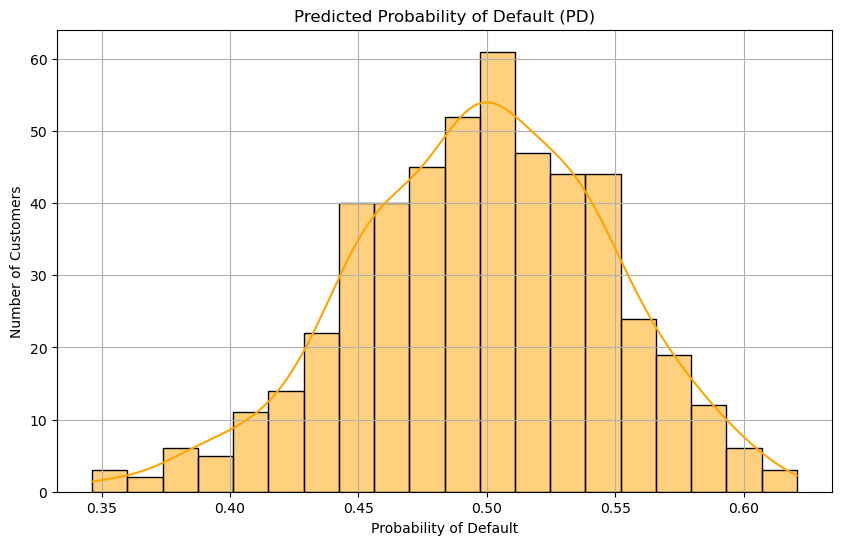

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(result_df['PD_Probability'], bins=20, kde=True, color='orange')
plt.title('Predicted Probability of Default (PD)')
plt.xlabel('Probability of Default')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()